## Reinforcement Learning Project
### Frozen Lake Problem

Folder Descriptions:
1. Run 1:
    - is_slippery = False
    - learning_rate_a = 0.9
    - discount_factor_g = 0.9
    - epsilon_decay_rate = 0.0001

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

In [4]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('frozen_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        
        if episodes >= 10 and i % (int(episodes / 10)) == 0:
            print(f'episode {i}')
        
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    # Calculate running sum of rewards
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    
    
    ## Print plot
    plt.xlabel('Episodes')
    plt.ylabel('Running Sum of Rewards (100 episodes)')
    plt.title('Agent Training')
    plt.plot(sum_rewards)
    
    ## Save plot
    if is_training:
        plt.savefig(f'Train_graph_{episodes}.png')
    else:
        plt.savefig(f'Test_graph_{episodes}.png')
    
    # Save q-table
    if is_training:
        f = open(f"Trained_policy_{episodes}.pkl","wb")
        pickle.dump(q, f)
        f.close()
    
    return rewards_per_episode


## Training

episode 0
episode 1000
episode 2000
episode 3000
episode 4000
episode 5000
episode 6000
episode 7000
episode 8000
episode 9000
episode 10000
episode 11000
episode 12000
episode 13000
episode 14000
Total Runtime: 3.5350589752197266


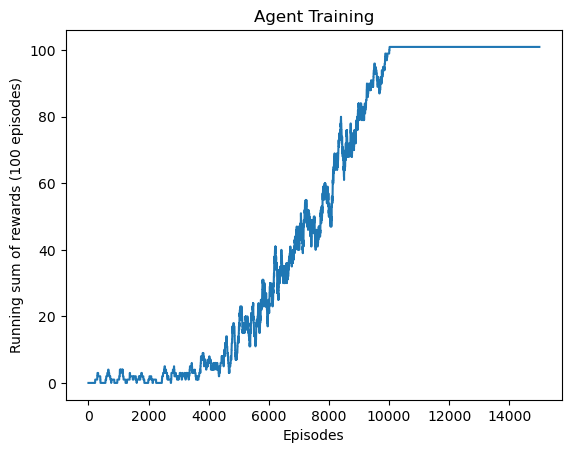

In [15]:
start_time = time.time()

rewards_per_episode = run(15000, is_training=True, render=False)

print(f'Total Runtime: {time.time() - start_time}')

## Testing With Rendering

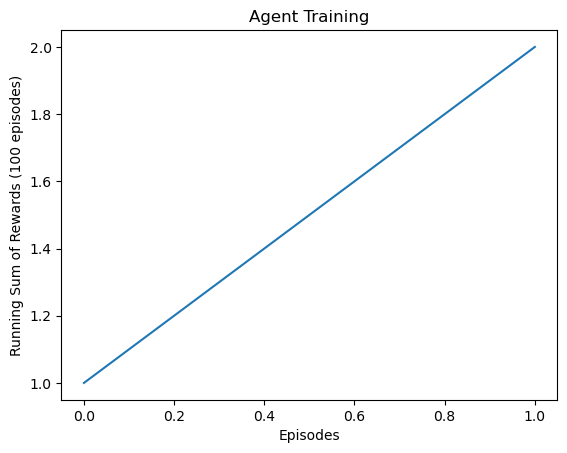

In [5]:
rewards_per_episode = run(2, is_training=False, render=True)

## Gamma 0.1

In [22]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
#     else:
#         f = open('frozen_lake8x8.pkl', 'rb')
#         q = pickle.load(f)
#         f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.1 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)
    epsilon_values = []

    for i in range(episodes):
        
        if episodes >= 10 and i % (int(episodes / 10)) == 0:
            print(f'episode {i}')
        
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)
        epsilon_values.append(epsilon)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    # Calculate running sum of rewards
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    
    
    ## Print plot
    plt.xlabel('Episodes')
    plt.ylabel('Running Sum of Rewards (100 episodes)')
    plt.title('Agent Training')
    plt.plot(sum_rewards)
    
    ## Save plot
#     if is_training:
#         plt.savefig(f'Train_graph_{episodes}.png')
#     else:
#         plt.savefig(f'Test_graph_{episodes}.png')
    
    # Save q-table
    if is_training:
        f = open(f"Trained_policy_{episodes}.pkl","wb")
        pickle.dump(q, f)
        f.close()
    
    return rewards_per_episode


episode 0
episode 1500
episode 3000
episode 4500
episode 6000
episode 7500
episode 9000
episode 10500
episode 12000
episode 13500
Total Runtime: 3.285547971725464


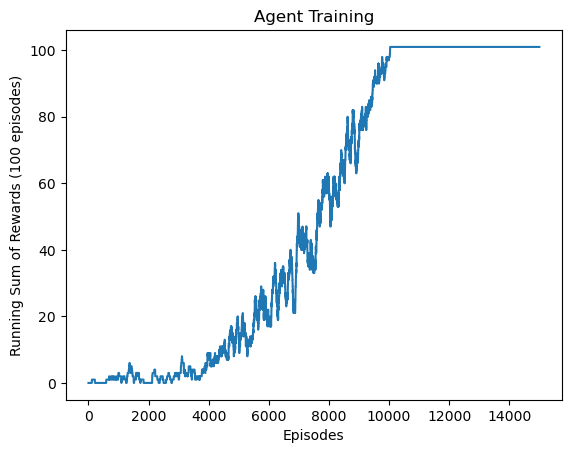

In [23]:
start_time = time.time()

rewards_per_episode = run(15000, is_training=True, render=False)

print(f'Total Runtime: {time.time() - start_time}')